# CNN (convolutional neural network)

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models, layers
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
train_images.shape

(50000, 32, 32, 3)

In [35]:
# This is 2D Array we need to convert this into 1D array
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
train_labels=train_labels.reshape(-1,)
train_labels[:18]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3], dtype=uint8)

In [37]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [38]:
classes[9]

'truck'

In [39]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

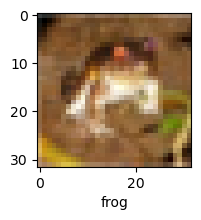

In [40]:

plot_sample(train_images,train_labels,0)

In [41]:
train_images[0]/255

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [42]:
# Here we built the model for CNN 
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),                 # This layer is created for CNN
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),                   # This layer is created for CNN
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
# This compiles CNN and configure it for training
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss function is used to compile the errors during training
              metrics=['accuracy'])            #evaluation metric(s) used to monitor the model's performance during training and testing

In [44]:
cnn.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4408 - accuracy: 0.4826
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0853 - accuracy: 0.6207
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9509 - accuracy: 0.6680
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8586 - accuracy: 0.7020
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7918 - accuracy: 0.7252
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7286 - accuracy: 0.7459
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6830 - accuracy: 0.7622
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6377 - accuracy: 0.7769
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5910 - accuracy: 0.7928
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [45]:
cnn.evaluate(train_images,train_labels)

1563/1563 [==============================] - 12s 8ms/step - loss: 0.4557 - accuracy: 0.8421


[0.4557395577430725, 0.8421000242233276]